# How do we find the minimum likelihood?

There are two basic types of methods for doing this, one that ignores the shape of the parameter space and one that uses slope information to determine the best direction to move.  First, we consider the case where we do not take into account slope information...

## Simplex / Nelder-Mead

This method uses a geometrical construct called a "simplex" to basically pivot/tumble around in parameter space from one vertex through the others.  A simplex a generalization of a triangle or tetrahedron in arbitrary dimensions (https://en.wikipedia.org/wiki/Simplex):

0D = point

1D = line

2D = triangle

3D = tetrahedron

...

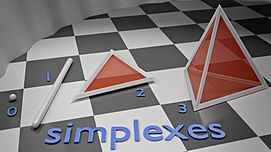

In [2]:
from IPython.display import Image
Image('Simplexes.jpg',width=600)

### A summary of one possible algorithm :

1.  You place the simplex at a starting point in parameter space and calculate the likelihood at each vertice.  The size and position of the initial simplex is very important but difficult to determine a priori.

2.  You usually start by reflecting the vertice with the worse likelihood through the opposite side.

3.  Depending on the reflected value you may choose to:
    a.) Use that reflection
    b.) Expand or Contract the simplex along the reflection
    c.) Shrink all but the best vertice of the simplex
    
    The amount by which you move is arbitrary but has some standard values.
    
https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method#/media/File:Nelder-Mead_Himmelblau.gif

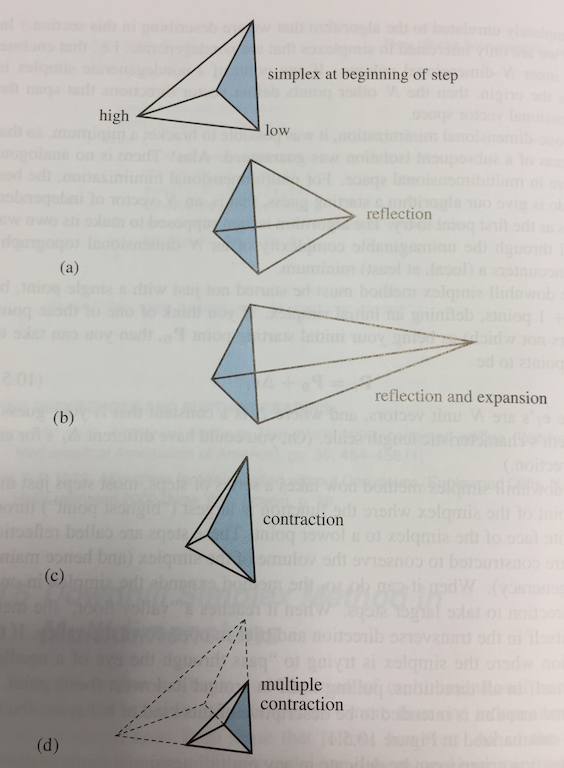

In [3]:
Image('simplex_iters.png',width=600)  # from Numerical Recipes

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 41
         Function evaluations: 82
[ 1.]


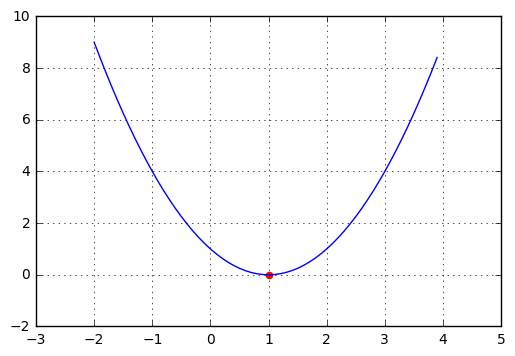

In [4]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import optimize
import numpy as np
import math
import sys
import scipy

from scipy.optimize import fmin,leastsq,fminbound,basinhopping

def f(x):
    return (x-1)**2
x0=1000
xopt=fmin(f,x0,xtol=1e-8)
print(xopt)

x = np.arange(-2, 4, 0.1);
plt.plot(x, f(x))
plt.scatter(xopt, f(xopt), color='r')
plt.grid()
plt.show()


## Damped Least Squares (Levenberg-Marquardt)

Now, we take into account the slope (a Gauss-Newton approach) and slide down it (a gradient descent approach).

https://en.wikipedia.org/wiki/Levenberg%E2%80%93Marquardt_algorithm

For the function, $f(x,\beta)$ that we want to minimize, where $\beta$ is the vector of parameters, we want to step away from the starting point by a certain amount, $\delta$, taking into account the slope, $J = \frac {\partial f(x,\beta)} {\partial \beta}$, the Jacobian.  To do this, we approximate the local curvature linearly (e.g., first order Taylor expansion):

$$f(x_i,\beta + \delta) = f(x_i,\beta) + J_i \delta$$

Then you minimize the sum of the squares:

$$S(\beta + \delta) = \sum_{i=1}^{m} (y_i - f(x_i,\beta) - J_i \delta)^2$$

If you then do a bunch of matrix math..., you can solve for $\delta$.  The difference between this algorithm and the Gauss-Newton approach is the addition of a damping term that guarantees a solution for $\delta$ (makes the matrices invertible) in all cases.

Let's use python's implementation of these codes to solve some simple problems...





In [5]:
x1opt=leastsq(f,x0,xtol=1e-8)
print(x1opt)


(array([ 1.00000001]), 2)


One option to speed up the minimization process is to limit the search of parameter space or add bounds.  This makes an assumption (e.g., physically) about the range of your parameters.  However, doing so could cause you to miss a minimum, so this should generally be done very carefully and conservatively.  For example...




1.0


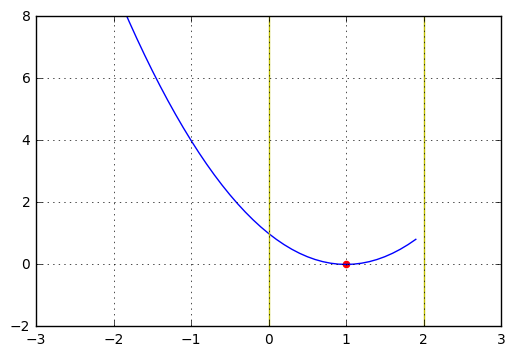

In [9]:
r_bound=0
l_bound=2
xmin = fminbound(f,r_bound,l_bound)
print(xmin)
plt.plot(x, f(x))
plt.scatter(xmin, f(xmin), color='r')
plt.plot([r_bound,r_bound],[-2,10], color='y')
plt.plot([l_bound,l_bound],[-2,10], color='y')
plt.ylim(-2,8)
plt.grid()
plt.show()


But, even without bounds, these simpler, more local minimization codes do not always work.  For example...



Optimization terminated successfully.
         Current function value: 7.257526
         Iterations: 30
         Function evaluations: 60
Result from fmin: [ 0.95788279]


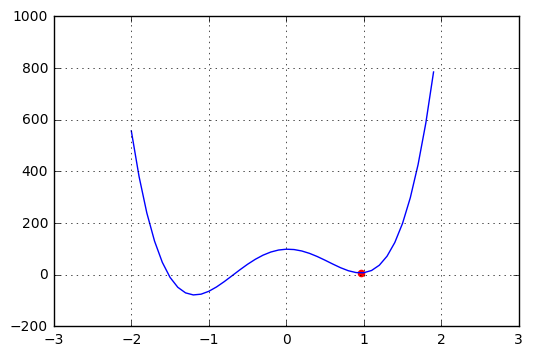

In [7]:
# Initial guess
xin = 2

def func(x):

    return (-1+3*x)**3+100*(1-x**2)**2

# Run the minization
res = fmin(func, xin, xtol=1e-8)
print("Result from fmin:", res)

x = np.arange(-2, 2, 0.1);
plt.plot(x, func(x))
plt.scatter(res, func(res), color='r')
plt.grid()
plt.show()

In [8]:
# use another minimization routine to find the other minimum more robustly

There are less local (no true global) minimization routines that try to avoid this:  basin-hopping, monte carlo or grid + one of the above...???